Sampling ratio 0.2: AB-MIL vs Rank Induction: p = 0.210, Attention Induction vs Rank Induction: p = 0.210
Sampling ratio 0.4: AB-MIL vs Rank Induction: p = 0.016, Attention Induction vs Rank Induction: p = 0.016
Sampling ratio 0.6: AB-MIL vs Rank Induction: p = 0.008, Attention Induction vs Rank Induction: p = 0.008
Sampling ratio 0.8: AB-MIL vs Rank Induction: p = 0.500, Attention Induction vs Rank Induction: p = 0.210
Sampling ratio 1.0: AB-MIL vs Rank Induction: p = 0.028, Attention Induction vs Rank Induction: p = 0.111


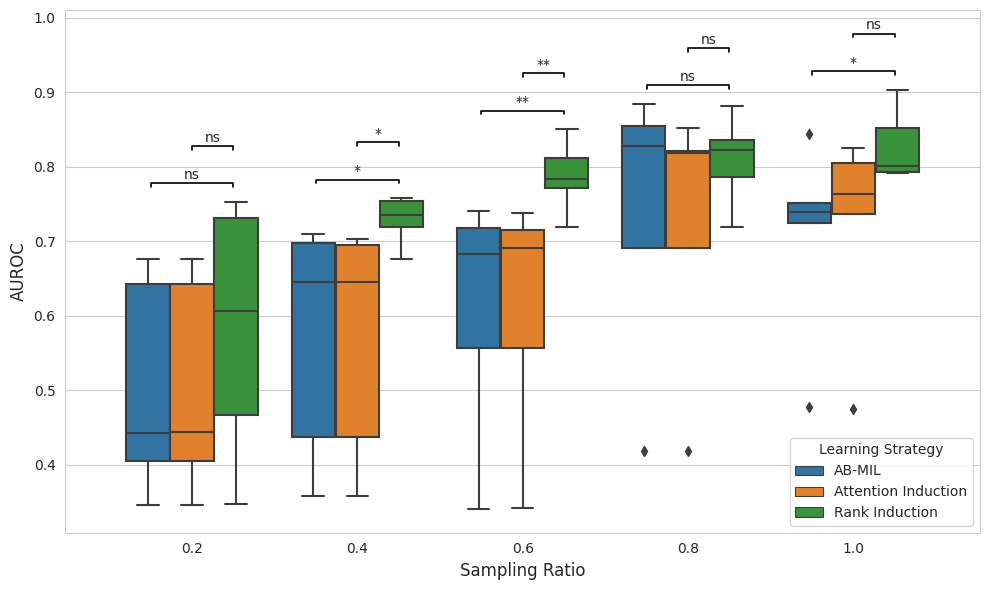

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

df = pd.read_csv('/vast/AI_team/gshwang/code/250429_attinduc_anno_test/notebooks/JofPATH/250519_experiments.csv')
df = df[
    (df['dataset'] == 'camelyon') &
    (df['morphology_value'] == 0) &
    (df['anno_ratio'] == 1) &
    (df['model'].isin(['abmil', 'att', 'rank'])) &
    (df['random_state'].between(2023, 2027))
]

model_map = {
    'abmil': 'AB-MIL',
    'att': 'Attention Induction',
    'rank': 'Rank Induction'
}
df['Model'] = df['model'].map(model_map)
df['Sampling Ratio'] = df['sampling_ratio']

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

hue_order = ["AB-MIL", "Attention Induction", "Rank Induction"]
ax = sns.boxplot(
    x='Sampling Ratio',
    y='auroc',
    hue='Model',
    data=df,
    hue_order=hue_order,
    showfliers=True
)

def sig_label(p):
    if p < 0.001: 
        return '***'
    elif p < 0.01: 
        return '**'
    elif p < 0.05: 
        return '*'
    else: 
        return 'ns'

offsets = {
    'AB-MIL': -0.25,
    'Attention Induction':  0.00,
    'Rank Induction':       +0.25
}

for i, sr in enumerate(sorted(df['Sampling Ratio'].unique())):
    sub = df[df['Sampling Ratio'] == sr]
    ab   = sub[sub['Model']=='AB-MIL']['auroc'].values
    att  = sub[sub['Model']=='Attention Induction']['auroc'].values
    rank = sub[sub['Model']=='Rank Induction']['auroc'].values
    
    # abmil vs rank
    _, p_ab = mannwhitneyu(ab, rank, alternative='less')
    # att vs rank
    _, p_at = mannwhitneyu(att, rank, alternative='less')
    # print(f"AB-MIL: {ab}, Attention: {att}, Rank: {rank}")
    print(f"Sampling ratio {sr:.1f}: AB-MIL vs Rank Induction: p = {p_ab:.3f}, "
          f"Attention Induction vs Rank Induction: p = {p_at:.3f}")
    
    y0 = sub['auroc'].max() + 0.02
    
    # ─── abmil vs rank ───
    x1, x2 = i + offsets['AB-MIL'], i + offsets['Rank Induction']
    y, h = y0, 0.005
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
    ax.text((x1+x2)/2, y+h+0.002, sig_label(p_ab),
            ha='center', va='bottom', fontsize=10)
    
    # ─── attention vs rank ───
    y2 = y0 + 0.05  
    x1, x2 = i + offsets['Attention Induction'], i + offsets['Rank Induction']
    ax.plot([x1, x1, x2, x2], [y2, y2+h, y2+h, y2], lw=1.2, c='k')
    ax.text((x1+x2)/2, y2+h+0.002, sig_label(p_at),
            ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Sampling Ratio', fontsize=12)
ax.set_ylabel('AUROC', fontsize=12)
ax.legend(title='Learning Strategy', loc='lower right')
plt.tight_layout()
plt.show()


In [10]:
df

,Name,model,dataset,morphology_value,random_state,sampling_ratio,anno_ratio,accuracy,auroc,test_loss,...,train_sensitivity,train_specificity,val_accuracy,val_auroc,val_loss,val_prauc,val_sensitivity,val_specificity,Model,Sampling Ratio
100,resnet50_20x_attention_induction_2023_0.2,att,camelyon,0,2023,0.2,1.0,0.620155,0.405612,0.688765,...,1.000000,0.173913,0.363636,0.571429,0.725648,0.574026,0.750000,0.142857,Attention Induction,0.2
101,resnet50_20x_attention_induction_2023_0.4,att,camelyon,0,2023,0.4,1.0,0.790698,0.694898,0.622921,...,0.735294,0.961538,0.772727,0.888889,0.388995,0.877246,0.555556,0.923077,Attention Induction,0.4
102,resnet50_20x_attention_induction_2023_0.6,att,camelyon,0,2023,0.6,1.0,0.790698,0.715816,0.564284,...,0.873418,0.660000,0.878788,0.932331,0.323917,0.933059,0.785714,0.947368,Attention Induction,0.6
103,resnet50_20x_attention_induction_2023_0.8,att,camelyon,0,2023,0.8,1.0,0.806202,0.821429,0.475995,...,0.797872,0.871795,0.727273,0.793684,0.559389,0.815117,0.578947,0.840000,Attention Induction,0.8
109,resnet50_20x_attention_induction_2023_wo_thrshold,att,camelyon,0,2023,1.0,1.0,0.821705,0.825765,0.579863,...,0.954128,0.971963,0.888889,0.934659,0.384106,0.943335,0.772727,0.968750,Attention Induction,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,resnet50x_3rd_base_2023,abmil,camelyon,0,2023,1.0,1.0,0.844961,0.844388,0.429192,...,0.934783,0.967742,0.888889,0.947443,0.291574,0.953617,0.772727,0.968750,AB-MIL,1.0
316,resnet50x_3rd_base_2024,abmil,camelyon,0,2024,1.0,1.0,0.813953,0.739541,0.514189,...,0.752137,0.858586,0.759259,0.896307,0.466530,0.871137,0.909091,0.656250,AB-MIL,1.0
317,resnet50x_3rd_base_2025,abmil,camelyon,0,2025,1.0,1.0,0.604651,0.477041,0.683175,...,0.784483,0.300000,0.425926,0.517045,0.715911,0.406491,0.727273,0.218750,AB-MIL,1.0
318,resnet50x_3rd_base_2026,abmil,camelyon,0,2026,1.0,1.0,0.806202,0.724235,0.578620,...,0.870000,0.905172,0.870370,0.967330,0.361347,0.958700,0.954545,0.812500,AB-MIL,1.0


In [ ]:
import pandas as pd

df = pd.read_csv('/vast/AI_team/gshwang/code/250429_attinduc_anno_test/notebooks/JofPATH/250519_experiments.csv')
df = df[
    (df['dataset'] == 'camelyon') &
    (df['morphology_value'] == 0) &
    (df['anno_ratio'] == 1) &
    (df['model'].isin(['abmil', 'att', 'rank'])) &
    (df['random_state'].between(2023, 2027))
]

model_map = {
    'abmil': 'AB-MIL',
    'att':   'Attention Induction',
    'rank':  'Rank Induction'
}
df['Model'] = df['model'].map(model_map)
df['Sampling Ratio'] = df['sampling_ratio']

metrics = ['auroc']  # ['auroc','auprc','accuracy'] 처럼 확장 가능
summary = (
    df
    .groupby(['Sampling Ratio','Model'])[metrics]
    .agg(['mean','std'])
    .round(3)
)

print(summary)


                                    auroc       
                                     mean    std
Sampling Ratio Model                            
0.2            AB-MIL               0.503  0.147
               Attention Induction  0.503  0.147
               Rank Induction       0.581  0.173
0.4            AB-MIL               0.570  0.162
               Attention Induction  0.568  0.159
               Rank Induction       0.729  0.033
0.6            AB-MIL               0.608  0.165
               Attention Induction  0.609  0.165
               Rank Induction       0.788  0.049
0.8            AB-MIL               0.736  0.192
               Attention Induction  0.721  0.180
               Rank Induction       0.809  0.061
1.0            AB-MIL               0.707  0.137
               Attention Induction  0.721  0.142
               Rank Induction       0.828  0.049


Sampling ratio 0.2: AB-MIL vs Rank Induction: p = 0.013, Attention Induction vs Rank Induction: p = 0.013,CLAM_SB vs Rank Induction: p = 0.121,CLAM_MB vs Rank Induction: p = 0.016,
Sampling ratio 0.4: AB-MIL vs Rank Induction: p = 0.002, Attention Induction vs Rank Induction: p = 0.002,CLAM_SB vs Rank Induction: p = 0.002,CLAM_MB vs Rank Induction: p = 0.001,
Sampling ratio 0.6: AB-MIL vs Rank Induction: p = 0.027, Attention Induction vs Rank Induction: p = 0.023,CLAM_SB vs Rank Induction: p = 0.339,CLAM_MB vs Rank Induction: p = 0.192,
Sampling ratio 0.8: AB-MIL vs Rank Induction: p = 0.038, Attention Induction vs Rank Induction: p = 0.016,CLAM_SB vs Rank Induction: p = 0.192,CLAM_MB vs Rank Induction: p = 0.260,
Sampling ratio 1.0: AB-MIL vs Rank Induction: p = 0.032, Attention Induction vs Rank Induction: p = 0.032,CLAM_SB vs Rank Induction: p = 0.081,CLAM_MB vs Rank Induction: p = 0.137,


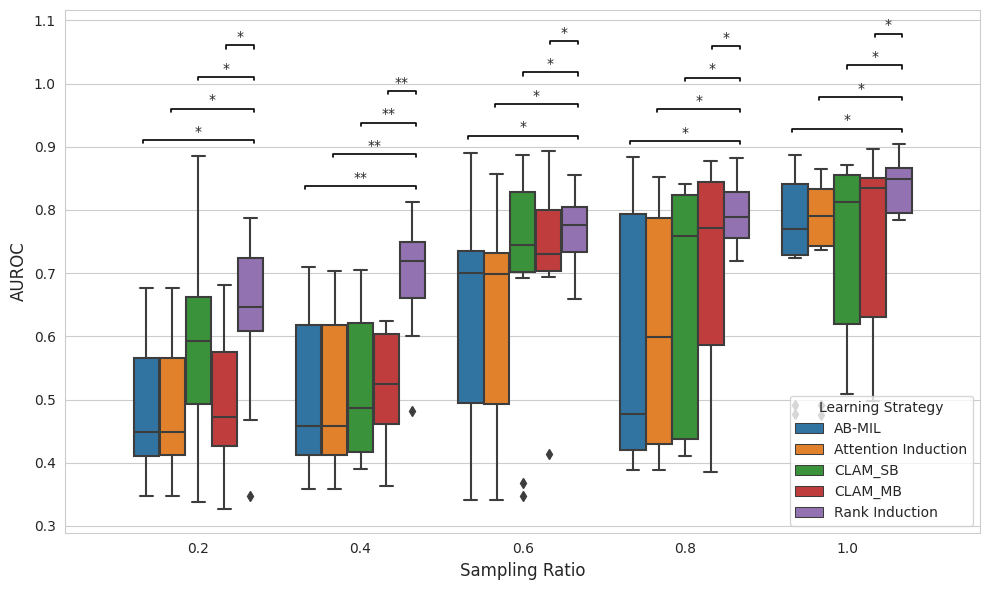

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

df = pd.read_csv('/vast/AI_team/gshwang/code/250429_attinduc_anno_test/notebooks/JofPATH/250701_experiments.csv')
df = df[
    (df['dataset'] == 'camelyon') &
    (df['morphology_value'] == 0) &
    (df['anno_ratio'] == 1) &
    (df['model'].isin(['abmil', 'att', 'rank', 'clam_mb', 'clam_sb'])) &
    (df['random_state'].between(2018, 2027))
]

model_map = {
    'abmil': 'AB-MIL',
    'att': 'Attention Induction',
    'clam_sb': 'CLAM_SB',
    'clam_mb': 'CLAM_MB',
    'rank': 'Rank Induction'
}
df['Model'] = df['model'].map(model_map)
df['Sampling Ratio'] = df['sampling_ratio']

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

hue_order = ["AB-MIL", "Attention Induction", "CLAM_SB", "CLAM_MB","Rank Induction"]
ax = sns.boxplot(
    x='Sampling Ratio',
    y='auroc',
    hue='Model',
    data=df,
    hue_order=hue_order,
    showfliers=True
)

def sig_label(p):
    if p < 0.001: 
        return '***'
    elif p < 0.01: 
        return '**'
    elif p < 0.05: 
        return '*'
    else: 
        return 'ns'

offsets = {
    'AB-MIL': -0.34,
    'Attention Induction': -0.17,
    'CLAM_SB': 0.00,
    'CLAM_MB': +0.17,
    'Rank Induction': +0.34
}

for i, sr in enumerate(sorted(df['Sampling Ratio'].unique())):
    sub = df[df['Sampling Ratio'] == sr]
    ab   = sub[sub['Model']=='AB-MIL']['auroc'].values
    att  = sub[sub['Model']=='Attention Induction']['auroc'].values
    rank = sub[sub['Model']=='Rank Induction']['auroc'].values
    sb = sub[sub['Model']=='CLAM_SB']['auroc'].values
    mb = sub[sub['Model']=='CLAM_MB']['auroc'].values
    
    _, p_ab = mannwhitneyu(ab, rank, alternative='less')
    _, p_at = mannwhitneyu(att, rank, alternative='less')
    _, p_sb = mannwhitneyu(sb, rank, alternative='less')
    _, p_mb = mannwhitneyu(mb, rank, alternative='less')
    # print(f"AB-MIL: {ab}, Attention: {att}, Rank: {rank}")
    print(f"Sampling ratio {sr:.1f}: AB-MIL vs Rank Induction: p = {p_ab:.3f}, "
          f"Attention Induction vs Rank Induction: p = {p_at:.3f},"
          f"CLAM_SB vs Rank Induction: p = {p_sb:.3f},"
          f"CLAM_MB vs Rank Induction: p = {p_mb:.3f},")
    
    y0 = sub['auroc'].max() + 0.02
    
    # ─── abmil vs rank ───
    x1, x2 = i + offsets['AB-MIL'], i + offsets['Rank Induction']
    y, h = y0, 0.005
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
    ax.text((x1+x2)/2, y+h+0.002, sig_label(p_ab),
            ha='center', va='bottom', fontsize=10)
    
    # ─── attention vs rank ───
    y2 = y0 + 0.05  
    x1, x2 = i + offsets['Attention Induction'], i + offsets['Rank Induction']
    ax.plot([x1, x1, x2, x2], [y2, y2+h, y2+h, y2], lw=1.2, c='k')
    ax.text((x1+x2)/2, y2+h+0.002, sig_label(p_at),
            ha='center', va='bottom', fontsize=10)
    
    # ─── sb vs rank ───
    y3 = y2 + 0.05  
    x1, x2 = i + offsets['CLAM_SB'], i + offsets['Rank Induction']
    ax.plot([x1, x1, x2, x2], [y3, y3+h, y3+h, y3], lw=1.2, c='k')
    ax.text((x1+x2)/2, y3+h+0.002, sig_label(p_at),
            ha='center', va='bottom', fontsize=10)
    
    # ─── mb vs rank ───
    y4 = y3 + 0.05  
    x1, x2 = i + offsets['CLAM_MB'], i + offsets['Rank Induction']
    ax.plot([x1, x1, x2, x2], [y4, y4+h, y4+h, y4], lw=1.2, c='k')
    ax.text((x1+x2)/2, y4+h+0.002, sig_label(p_at),
            ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Sampling Ratio', fontsize=12)
ax.set_ylabel('AUROC', fontsize=12)
ax.legend(title='Learning Strategy', loc='lower right')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv('/vast/AI_team/gshwang/code/250429_attinduc_anno_test/notebooks/JofPATH/250701_experiments.csv')
df = df[
    (df['dataset'] == 'camelyon') &
    (df['morphology_value'] == 0) &
    (df['anno_ratio'] == 1) &
    (df['model'].isin(['abmil', 'att', 'rank', 'clam_mb', 'clam_sb'])) &
    (df['random_state'].between(2018, 2027))
]

model_map = {
    'abmil': 'AB-MIL',
    'att': 'Attention Induction',
    'clam_sb': 'CLAM_SB',
    'clam_mb': 'CLAM_MB',
    'rank': 'Rank Induction'
}
df['Model'] = df['model'].map(model_map)
df['Sampling Ratio'] = df['sampling_ratio']

metrics = ['auroc']  
summary = (
    df
    .groupby(['Sampling Ratio','Model'])[metrics]
    .agg(['mean','std'])
    .round(3)
)

print(summary)


                                    auroc       
                                     mean    std
Sampling Ratio Model                            
0.2            AB-MIL               0.486  0.116
               Attention Induction  0.486  0.116
               CLAM_MB              0.498  0.116
               CLAM_SB              0.575  0.165
               Rank Induction       0.630  0.135
0.4            AB-MIL               0.508  0.131
               Attention Induction  0.508  0.129
               CLAM_MB              0.517  0.095
               CLAM_SB              0.520  0.117
               Rank Induction       0.691  0.094
0.6            AB-MIL               0.632  0.189
               Attention Induction  0.625  0.180
               CLAM_MB              0.726  0.127
               CLAM_SB              0.702  0.191
               Rank Induction       0.772  0.060
0.8            AB-MIL               0.586  0.206
               Attention Induction  0.605  0.187
               CLAM_

In [4]:
df.to_csv("./t.csv")

Sampling ratio 0.2: AB-MIL vs Rank Induction: p = 0.013, Attention Induction vs Rank Induction: p = 0.013,CLAM_SB vs Rank Induction: p = 0.121,CLAM_MB vs Rank Induction: p = 0.016,
Sampling ratio 0.4: AB-MIL vs Rank Induction: p = 0.002, Attention Induction vs Rank Induction: p = 0.002,CLAM_SB vs Rank Induction: p = 0.002,CLAM_MB vs Rank Induction: p = 0.001,
Sampling ratio 0.6: AB-MIL vs Rank Induction: p = 0.027, Attention Induction vs Rank Induction: p = 0.023,CLAM_SB vs Rank Induction: p = 0.339,CLAM_MB vs Rank Induction: p = 0.192,
Sampling ratio 0.8: AB-MIL vs Rank Induction: p = 0.038, Attention Induction vs Rank Induction: p = 0.016,CLAM_SB vs Rank Induction: p = 0.192,CLAM_MB vs Rank Induction: p = 0.260,
Sampling ratio 1.0: AB-MIL vs Rank Induction: p = 0.032, Attention Induction vs Rank Induction: p = 0.032,CLAM_SB vs Rank Induction: p = 0.081,CLAM_MB vs Rank Induction: p = 0.137,


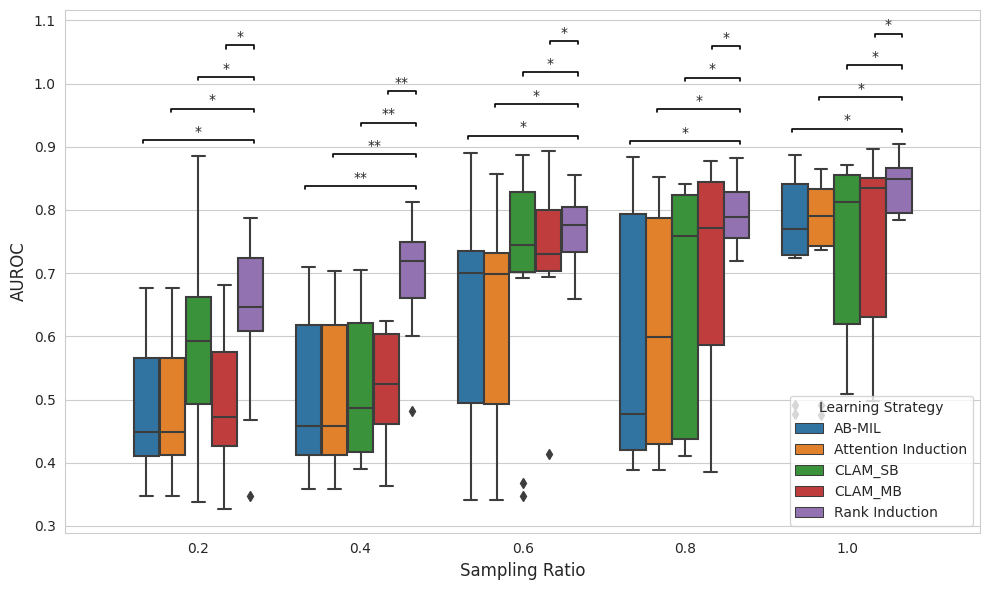

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

df = pd.read_csv('/vast/AI_team/gshwang/code/250429_attinduc_anno_test/notebooks/JofPATH/250701_experiments.csv')
df = df[
    (df['dataset'] == 'camelyon') &
    (df['morphology_value'] == 0) &
    (df['anno_ratio'] == 1) &
    (df['model'].isin(['abmil', 'att', 'rank', 'clam_mb', 'clam_sb'])) &
    (df['random_state'].between(2018, 2027))
]

model_map = {
    'abmil': 'AB-MIL',
    'att': 'Attention Induction',
    'clam_sb': 'CLAM_SB',
    'clam_mb': 'CLAM_MB',
    'rank': 'Rank Induction'
}
df['Model'] = df['model'].map(model_map)
df['Sampling Ratio'] = df['sampling_ratio']

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

hue_order = ["AB-MIL", "Attention Induction", "CLAM_SB", "CLAM_MB","Rank Induction"]
ax = sns.boxplot(
    x='Sampling Ratio',
    y='auroc',
    hue='Model',
    data=df,
    hue_order=hue_order,
    showfliers=True
)

def sig_label(p):
    if p < 0.001: 
        return '***'
    elif p < 0.01: 
        return '**'
    elif p < 0.05: 
        return '*'
    else: 
        return 'ns'

offsets = {
    'AB-MIL': -0.34,
    'Attention Induction': -0.17,
    'CLAM_SB': 0.00,
    'CLAM_MB': +0.17,
    'Rank Induction': +0.34
}

for i, sr in enumerate(sorted(df['Sampling Ratio'].unique())):
    sub = df[df['Sampling Ratio'] == sr]
    ab   = sub[sub['Model']=='AB-MIL']['auroc'].values
    att  = sub[sub['Model']=='Attention Induction']['auroc'].values
    rank = sub[sub['Model']=='Rank Induction']['auroc'].values
    sb = sub[sub['Model']=='CLAM_SB']['auroc'].values
    mb = sub[sub['Model']=='CLAM_MB']['auroc'].values
    
    # abmil vs rank
    _, p_ab = mannwhitneyu(ab, rank, alternative='less')
    # att vs rank
    _, p_at = mannwhitneyu(att, rank, alternative='less')
    _, p_sb = mannwhitneyu(sb, rank, alternative='less')
    _, p_mb = mannwhitneyu(mb, rank, alternative='less')
    # print(f"AB-MIL: {ab}, Attention: {att}, Rank: {rank}")
    print(f"Sampling ratio {sr:.1f}: AB-MIL vs Rank Induction: p = {p_ab:.3f}, "
          f"Attention Induction vs Rank Induction: p = {p_at:.3f},"
          f"CLAM_SB vs Rank Induction: p = {p_sb:.3f},"
          f"CLAM_MB vs Rank Induction: p = {p_mb:.3f},")
    
    y0 = sub['auroc'].max() + 0.02
    
    # ─── abmil vs rank ───
    x1, x2 = i + offsets['AB-MIL'], i + offsets['Rank Induction']
    y, h = y0, 0.005
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c='k')
    ax.text((x1+x2)/2, y+h+0.002, sig_label(p_ab),
            ha='center', va='bottom', fontsize=10)
    
    # ─── attention vs rank ───
    y2 = y0 + 0.05  
    x1, x2 = i + offsets['Attention Induction'], i + offsets['Rank Induction']
    ax.plot([x1, x1, x2, x2], [y2, y2+h, y2+h, y2], lw=1.2, c='k')
    ax.text((x1+x2)/2, y2+h+0.002, sig_label(p_at),
            ha='center', va='bottom', fontsize=10)
    
    # ─── sb vs rank ───
    y3 = y2 + 0.05  
    x1, x2 = i + offsets['CLAM_SB'], i + offsets['Rank Induction']
    ax.plot([x1, x1, x2, x2], [y3, y3+h, y3+h, y3], lw=1.2, c='k')
    ax.text((x1+x2)/2, y3+h+0.002, sig_label(p_at),
            ha='center', va='bottom', fontsize=10)
    
    # ─── mb vs rank ───
    y4 = y3 + 0.05  
    x1, x2 = i + offsets['CLAM_MB'], i + offsets['Rank Induction']
    ax.plot([x1, x1, x2, x2], [y4, y4+h, y4+h, y4], lw=1.2, c='k')
    ax.text((x1+x2)/2, y4+h+0.002, sig_label(p_at),
            ha='center', va='bottom', fontsize=10)

# 7. 마무리 스타일
ax.set_xlabel('Sampling Ratio', fontsize=12)
ax.set_ylabel('AUROC', fontsize=12)
ax.legend(title='Learning Strategy', loc='lower right')
plt.tight_layout()
plt.show()


In [12]:
df

,Name,model,dataset,morphology_value,random_state,sampling_ratio,anno_ratio,accuracy,auroc,test_loss,...,train_sensitivity,train_specificity,val_accuracy,val_auroc,val_loss,val_prauc,val_sensitivity,val_specificity,Model,Sampling Ratio
0,base_2018_0.2,abmil,camelyon,0,2018,0.2,1.0,0.620155,0.426276,0.682184,...,1.000000,0.050000,0.454545,0.466667,0.716087,0.399722,1.000000,0.000000,AB-MIL,0.2
1,base_2019_0.2,abmil,camelyon,0,2019,0.2,1.0,0.620155,0.454082,0.674082,...,0.000000,1.000000,0.545455,0.428571,0.697170,0.309294,0.000000,0.857143,AB-MIL,0.2
2,base_2020_0.2,abmil,camelyon,0,2020,0.2,1.0,0.620155,0.575000,0.669346,...,1.000000,0.000000,0.363636,0.607143,0.721606,0.591288,1.000000,0.000000,AB-MIL,0.2
3,base_2021_0.2,abmil,camelyon,0,2021,0.2,1.0,0.620155,0.537755,0.667472,...,1.000000,0.000000,0.454545,0.464286,0.707820,0.491567,1.000000,0.142857,AB-MIL,0.2
4,base_2022_0.2,abmil,camelyon,0,2022,0.2,1.0,0.620155,0.351786,0.684014,...,0.904762,0.272727,0.454545,0.333333,0.715282,0.348470,0.800000,0.166667,AB-MIL,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,resnet50_20x_ltr_2023,rank,camelyon,0,2023,1.0,1.0,0.837209,0.852041,0.670426,...,0.902174,0.959677,0.888889,0.916193,0.667007,0.923952,0.727273,1.000000,Rank Induction,1.0
362,resnet50_20x_ltr_2024,rank,camelyon,0,2024,1.0,1.0,0.837209,0.792602,0.704567,...,0.897436,0.969697,0.833333,0.911932,0.694750,0.912430,0.863636,0.812500,Rank Induction,1.0
374,resnet50_20x_ltr_2025,rank,camelyon,0,2025,1.0,1.0,0.852713,0.903827,0.601755,...,0.944954,0.971963,0.851852,0.903409,0.657204,0.905512,0.772727,0.906250,Rank Induction,1.0
386,resnet50_20x_ltr_2026,rank,camelyon,0,2026,1.0,1.0,0.821705,0.801276,0.713040,...,0.813084,0.935780,0.870370,0.951705,0.590628,0.951125,0.863636,0.875000,Rank Induction,1.0
